### Практическое задание к уроку № 7 по теме "Линейная регрессия. Двухвыборочный t-тест. A/B-тестирование".

#### Задание 1.
*Дана матрица объект-признак*
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
*и значения целевой переменной*
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

*Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости  
целевой переменной от значений этих признаков был максимальным.  
Другими словами, модель линейной регрессии на этих признаках должна давать  
наилучший результат. В качестве ответа запишите значение коэффициента  
детерминации для модели на этих признаках.*

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
            [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
            [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
            [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
            [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
            [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
            [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
            [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
            [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
            [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

Y = np.array([[9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
              7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]])

Для удобства работы с данными представим их в виде таблицы:

In [3]:
data = np.hstack((X, Y.T))
columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = pd.DataFrame(data=data, columns=columns)
df

,x1,x2,x3,x4,y
0,1.224013,2.308685,3.036364,2.692872,9.261934
1,-0.187573,1.303374,5.120930,3.463632,9.700363
2,-0.810945,1.824634,5.796865,1.861594,8.672148
3,0.751290,2.673921,3.655298,1.667461,8.747970
4,0.009724,1.973673,2.505943,1.697552,6.186891
5,-0.629726,0.777508,2.841240,4.544106,7.533127
6,2.295362,1.812067,1.950262,1.518746,7.576438
7,0.092042,2.269714,7.477087,2.610812,12.449655
8,2.392528,3.175640,3.614206,5.107734,14.290107
9,0.549838,2.879887,1.657528,1.596360,6.683612


Зададим функцию для нахождения коэффициента детерминации  
с помощью метода наименьших квадратов:

In [4]:
def R2(x1, x2, y):
    
    x = pd.concat([x1, x2], axis=1).values
    x0 = np.ones((x.shape[0], 1))
    x = np.hstack((x0, x))
    xtx = x.T.dot(x)
    xtx_inv = np.linalg.inv(xtx)
    
    b = xtx_inv.dot(x.T).dot(y)
    e = y - x.dot(b)
    SSres = ((e - e.mean())**2).sum()
    SSy = ((y - y.mean())**2).sum()
    
    return 1 - SSres / SSy

Для поиска пары признаков, на которых получим наибольший  
коэффициент детерминации, воспользуемся циклом:

In [5]:
R2_max = 0
i_idx = None
j_idx = None

for i_index, i in enumerate(columns[:-1]):
    for j in columns[i_index + 1:-1]:
        r2_score = R2(df[i], df[j], df['y'])
        
        if R2_max < r2_score:
            R2_max = r2_score
            i_idx = i_index
            j_idx = columns.index(j)
print(f'Максимальная величина коэффициента детерминации {R2_max} \n'
f'получена при использовании признаков {columns[i_idx]} и {columns[j_idx]}')

Максимальная величина коэффициента детерминации 0.7634246238793152 
получена при использовании признаков x1 и x3


In [6]:
print(f'Ответ: {R2_max}')

Ответ: 0.7634246238793152


#### Задание 2.  
*Является ли значимым уравнение регрессии, полученное в предыдущей задаче?  
В качестве ответа запишите 1, если является, и 0 иначе.*

Для решения задачи воспользуемся F-тестом Фишера.  
За нулевую гипотезу примем утверждение, что теоретический  
коэффициент детерминации равен 0.  
Найдём F-статистику:  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;F&space;=&space;\dfrac{R^2&space;/&space;m}{(1&space;-&space;R^2)&space;/&space;(n&space;-&space;m&space;-&space;1)}" title="\inline F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}" />

In [7]:
n = df.shape[0] # Число наблюдений
m = 2 # Число признаков

In [8]:
F = (R2_max / m) / ((1 - R2_max) / (n - m - 1))
F

11.29443912292265

Зададим уровень значимости <img src="https://latex.codecogs.com/svg.image?\inline&space;\alpha" title="\inline \alpha" />:

In [9]:
alpha = 0.05

Найдём левую границу правосторонней критической области <img src="https://latex.codecogs.com/svg.image?\inline&space;\Omega_\alpha" title="\inline \Omega_\alpha" />.  
Для этого найдём квантиль порядка <img src="https://latex.codecogs.com/svg.image?\inline&space;(1-\alpha)" title="\inline (1-\alpha)" /> для распределения Фишера  
с параметрами k1=m, k2=n-m-1:

In [10]:
import scipy.stats as stats

In [11]:
k1 = m
k2 = n - m - 1

t = stats.f.ppf(1 - alpha, k1, k2)
t


4.73741412777588

Отобразим критическую область на графике:

In [12]:
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['font.size'] = 15
rcParams['figure.figsize'] = 8, 5
plt.style.use('seaborn-whitegrid')

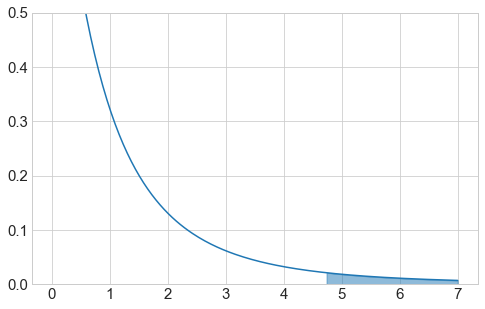

In [13]:
ox = np.linspace(0, 7, 200)
oy = stats.f(k1, k2).pdf(ox)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f(k1, k2).pdf(ox_right)

plt.plot(ox, oy)

plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.ylim(0, 0.5)

plt.show()

Наше значение статистики F (11,29) попадает в критическую область,  
поэтому нулевая гипотеза отвергается, уравнение признаётся  
значимым.

<u>Ответ:</u> 1.

#### Задание 3.  
*Для проведения A/B-тестирования сайта интернет-магазина были получены  
следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились  
совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились  
совершением покупки. Является ли значимым отличие конверсии на страницах `A`  
и `B`? В качестве ответа запишите 1, если является, и 0 иначе.*

*Подсказка. Реализуйте двухвыборочный t-тест. В качестве выборок здесь  
можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.*

Зададим выборки A и B, состоящие из нулей и единиц. Размер выборки будет  
равен количеству посещений соответствующей страницы. Единицами обозначим  
посещения, которые закончились покупкой, остальные посещения обозначим  
нулями:

In [14]:
A = np.ones((77, 1))
B = np.ones((60, 1))

In [15]:
A = np.vstack((A, np.zeros((2509-77, 1))))
B = np.vstack((B, np.zeros((1465-60, 1))))

За нулевую гипотезу примем утверждение, что математические ожидания  
двух этих выборок равны.

Воспользуемся t-статистикой для двухвыборочного теста:  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;t&space;=&space;\dfrac{\overline{A}&space;-&space;\overline{B}}{\sigma_\Delta}" title="\inline t = \dfrac{\overline{A} - \overline{B}}{\sigma_\Delta}" />

Среднее квадратичное отклонение разности между выборочными средними  
выборок <img src="https://latex.codecogs.com/svg.image?\inline&space;\sigma_\Delta" title="\inline \sigma_\Delta" /> найдём по формуле:  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;\sigma_\Delta&space;=&space;\sqrt{\dfrac{\sigma_A^2}{n_A}&space;&plus;&space;\dfrac{\sigma_B^2}{n_B}}" title="\inline \sigma_\Delta = \sqrt{\dfrac{\sigma_A^2}{n_A} + \dfrac{\sigma_B^2}{n_B}}" /> 

Для удобства дальнейших расчётов отдельно посчитаем величины  
под корнем:

In [16]:
X = np.var(A, ddof=1) / A.shape[0]
Y = np.var(B, ddof=1) / B.shape[0]

Тогда, <img src="https://latex.codecogs.com/svg.image?\inline&space;\sigma_\Delta" title="\inline \sigma_\Delta" /> будет равна:

In [17]:
std_delta = np.sqrt(X + Y)
std_delta

0.006220171278295827

Найдём t-статистику:

In [18]:
t = (A.mean() - B.mean()) / std_delta
t

-1.6504551408398205

Найдём количество степеней свободы распределения t-статистики:  
<br>
<img src="https://latex.codecogs.com/svg.image?\inline&space;df&space;=&space;\dfrac{\left(&space;\dfrac{\sigma_A^2}{n_A}&space;&plus;&space;\dfrac{\sigma_{B}^2}{n_B}&space;\right)^2}{\dfrac{\left(&space;\sigma_A^2&space;/&space;n_A&space;\right)^2}{n_A&space;-&space;1}&space;&plus;&space;\dfrac{\left(&space;\sigma_B^2&space;/&space;n_B&space;\right)^2}{n_B&space;-&space;1}}" title="\inline df = \dfrac{\left( \dfrac{\sigma_A^2}{n_A} + \dfrac{\sigma_{B}^2}{n_B} \right)^2}{\dfrac{\left( \sigma_A^2 / n_A \right)^2}{n_A - 1} + \dfrac{\left( \sigma_B^2 / n_B \right)^2}{n_B - 1}}" />

In [19]:
df = (X + Y)**2 / ((X**2 / (A.shape[0] - 1)) + (Y**2 / (B.shape[0])))
df

2734.4779590110347

Найдём границы критической области. Зададимся уровнем значимости α=0.05:

In [20]:
alpha = 0.05
t1 = stats.t.ppf(alpha/2, df=df)
t2 = stats.t.ppf(1-alpha/2, df=df)

t1, t2

(-1.9608319029496968, 1.9608319029496963)

Таким образом, критическая область имеет вид:  
<img src="https://latex.codecogs.com/svg.image?\inline&space;\Omega_\alpha&space;=&space;(-\infty,&space;-1.96)&space;\lor&space;(1.96,&space;&plus;\infty)" title="\inline \Omega_\alpha = (-\infty, -1.96) \lor (1.96, +\infty)" />

Наше значение статистики (-1,65) не попадает в критическую область.  
Следовательно, мы принимаем нулевую гипотезу о равенстве математических  
ожиданий двух выборок, то есть отличие конверсий на страницах А и В  
не является значимым.

Данную задачу можно было решить через встроенную в scipy функцию:

In [21]:
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=array([-1.65045514]), pvalue=array([0.09896479]))

Полученное р-значение больше нашего уровня значимости α=0,05. Это говорит  
о том, что при таком уровне значимости мы принимаем нулевую гипотезу,  
и отличие конверсий не является значимым.

<u>Ответ:</u> 0.